In [67]:
# Load important modules
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime
import pandas as pd
from collections import OrderedDict
from pylab import rcParams

rcParams['lines.linewidth'] = 2
rcParams['axes.titlesize'] = 20      
rcParams['axes.labelsize'] = 17.5

import pickle
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)

import warnings
warnings.filterwarnings("ignore")


#from latexPlot import latexify, format_axes
%matplotlib inline

## Let define important function for plotting

In [84]:
SPINE_COLOR = 'gray'
from math import sqrt

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.
    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 14,
              'text.fontsize': 12, # was 10
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 10,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
            
    }

    matplotlib.rcParams.update(params)
    



In [85]:
def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

#    matplotlib.pyplot.tight_layout()

    return ax



## Clean and Load Dataset

In [4]:
def clean_meta(ist):
    '''remove None elements in Meta Data ''' 
    clean_ist = ist.copy()
    for k,v in ist.items():
        if len(v) == 0:
            del clean_ist[k]
    return clean_ist
                
def parse_meta(meta):
    '''parse meta data for easy access'''
    M = {}
    for m in meta:
        for app in m:
            M[int(app['id'])] = clean_meta(app['meta'])
    return M

In [5]:
# specify path to read data and meta
# Please make sure you downloaded latest dataset from plaidplug.com.
Data_path = 'Data/PLAID/'
csv_path = Data_path + 'CSV/';

import json

# read meta
with open(Data_path + 'meta1.json') as data_file:    
    meta1 = json.load(data_file)

    
Meta = parse_meta([meta1])
meta1 = parse_meta([meta1])

In [6]:
# read data
# applinace types of all instances
Types = [x['type'] for x in Meta.values()]
# unique appliance types
Unq_type = list(set(Types)) 
Unq_type.sort()
IDs_for_read_data = list(Meta.keys())
# households of appliances
Locs = [x['header']['collection_time']+'_'+x['location'] for x in Meta.values()]
# unique households
Unq_loc = list(set(Locs))
Unq_loc.sort()
Origianl_Unq_type = Unq_type

In [7]:
# functions to read data and meta data
def read_data_given_id(path,ids,progress=True,last_offset=0):
    '''read data given a list of ids and CSV paths'''
    start = datetime.now()
    n = len(ids)
    if n == 0:
        return {}
    else:
        data = {}
        for (i,ist_id) in enumerate(ids, start=1):
            print('%d/%d (%2.0f%s) have been read(Done!) \t time consumed: %ds'\
            %(n,n,100,'%',(datetime.now()-start).seconds)) 
            if progress and np.mod(i,np.ceil(n/10))==0:
                print('%d/%d (%2.0f%s) have been read...\t time consumed: %ds'\
                      %(i,n,i/n*100,'%',(datetime.now()-start).seconds))
            if last_offset==0:
                data[ist_id] = np.genfromtxt(path+str(ist_id)+'.csv',delimiter=',',\
                                         names='current,voltage',dtype=(float,float)) 
            else:
                p=subprocess.Popen(['tail','-'+str(int(last_offset)),path+str(ist_id)+'.csv'],\
                                   stdout=subprocess.PIPE)   
                data[ist_id] = np.genfromtxt(p.stdout,delimiter=',',names='current,voltage',dtype=(float,float))
                
        print('%d/%d (%2.0f%s) have been read(Done!) \t time consumed: %ds'\
            %(n,n,100,'%',(datetime.now()-start).seconds))     
        return data

In [11]:
# read data
# estimated time cost:  ~ 1 mins
npts = 10000
Data = read_data_given_id(csv_path,IDs_for_read_data,progress=True, last_offset=npts)

1074/1074 (100%) have been read(Done!) 	 time consumed: 0s
1074/1074 (100%) have been read(Done!) 	 time consumed: 0s
1074/1074 (100%) have been read(Done!) 	 time consumed: 0s
1074/1074 (100%) have been read(Done!) 	 time consumed: 0s
1074/1074 (100%) have been read(Done!) 	 time consumed: 0s
1074/1074 (100%) have been read(Done!) 	 time consumed: 1s
1074/1074 (100%) have been read(Done!) 	 time consumed: 1s
1074/1074 (100%) have been read(Done!) 	 time consumed: 1s
1074/1074 (100%) have been read(Done!) 	 time consumed: 1s
1074/1074 (100%) have been read(Done!) 	 time consumed: 1s
1074/1074 (100%) have been read(Done!) 	 time consumed: 1s
1074/1074 (100%) have been read(Done!) 	 time consumed: 1s
1074/1074 (100%) have been read(Done!) 	 time consumed: 2s
1074/1074 (100%) have been read(Done!) 	 time consumed: 2s
1074/1074 (100%) have been read(Done!) 	 time consumed: 2s
1074/1074 (100%) have been read(Done!) 	 time consumed: 2s
1074/1074 (100%) have been read(Done!) 	 time consumed: 

### After reading the data use pickle to save in the file 

In [12]:
#Save data into files
output = open('Data/mydata.pkl', 'wb')
pickle.dump(Data, output)
output.close()

# Load the saved data for preprocessing

In [8]:
## Load data from pickel 
# read python dict back from the file

pkl_file = open('Data/mydata.pkl', 'rb')
Data = pickle.load(pkl_file)
pkl_file.close()

### Extract labels for appliance type and locations

In [9]:
type_Ids = {}
loc_Ids = {}
n = len(Data)
type_label = np.zeros(n,dtype='int')
loc_label = np.zeros(n,dtype='int')
for (ii,t) in enumerate(Unq_type):
    type_Ids[t] = [i-1 for i,j in enumerate(Types,start=1) if j == t]
    type_label[type_Ids[t]] = ii+1
for (ii,t) in enumerate(Unq_loc):
    loc_Ids[t] = [i-1 for i,j in enumerate(Locs,start=1) if j == t]
    loc_label[loc_Ids[t]] = ii+1
print('number of different types: %d'% len(Unq_type))
print('number of different households: %d'% len(Unq_loc))

number of different types: 11
number of different households: 55


### Save data into files

In [8]:

output = open('Data/loc_label.pkl', 'wb')
pickle.dump(loc_label, output)
output.close()

### Extract one representative period of steady state for each instance.

In [10]:
fs = 30000 #sampling frequency
npts = 10000
f0 = 60
NS = fs/f0 # number of samples per period
NP = npts/NS # number of periods for npts

# calculate the representative one period of steady state 
# (mean of the aggregated signals over one cycle)
n = len(Data)
rep_I = np.empty([n,NS])
rep_V = np.empty([n,NS])
for i in range(n):
    tempI = np.sum(np.reshape(Data[i+1]['current'],[NP,NS]),0)/NP
    tempV = np.sum(np.reshape(Data[i+1]['voltage'],[NP,NS]),0)/NP
    # align current to make all samples start from 0 and goes up
    ix = np.argsort(np.abs(tempI))
    j = 0
    while True:
        if ix[j]<499 and tempI[ix[j]+1]>tempI[ix[j]]:
            real_ix = ix[j]
            break
        else:
            j += 1
    rep_I[i,] = np.hstack([tempI[real_ix:],tempI[:real_ix]])
    rep_V[i,] = np.hstack([tempV[real_ix:],tempV[:real_ix]])

In [22]:
#Save data into files
output = open('Data/Current.pkl', 'wb')
pickle.dump(rep_I, output)
output.close()

output = open('Data/Voltage.pkl', 'wb')
pickle.dump(rep_V, output)
output.close()

### Create VI binary image

In [11]:
def center(X,w):
    minX = np.amin(X)
    maxX = np.amax(X)
    dist = max(abs(minX),maxX)
    X[X<-dist] = -dist
    X[X>dist] = dist
    d = (maxX-minX)/w
    return (X,d)
    
def get_img_from_VI(V, I, width,hard_threshold=False,para=.5):
    '''Get images from VI, hard_threshold, set para as threshold to cut off,5-10
    soft_threshold, set para to .1-.5 to shrink the intensity'''
    
    d = V.shape[0]
    # doing interploation if number of points is less than width*2
    if d<2* width:
        newI = np.hstack([V, V[0]])
        newV = np.hstack([I, I[0]])
        oldt = np.linspace(0,d,d+1)
        newt = np.linspace(0,d,2*width)
        I = np.interp(newt,oldt,newI)
        V = np.interp(newt,oldt,newV)
    # center the current and voltage, get the size resolution of mesh given width    
    (I,d_c)  = center(I,width)
    (V,d_v)  = center(V,width)
    
    #  find the index where the VI goes through in current-voltage axis
    ind_c = np.floor((I-np.amin(I))/d_c)
    ind_v = np.floor((V-np.amin(V))/d_v)
    ind_c[ind_c==width] = width-1
    ind_v[ind_v==width] = width-1
    
    Img = np.zeros((width,width))
    
    for i in range(len(I)):
        Img[ind_c[i],width-ind_v[i]-1] += 1
    
    if hard_threshold:
        Img[Img<para] = 0
        Img[Img!=0] = 1
        return Img
    else:
        return (Img/np.max(Img))**para

In [12]:
n = len(Data)
width = 16

Imgs = np.zeros((n,width,width), dtype=np.float64)
for i in range(n):
    Imgs[i,:,:] = get_img_from_VI(rep_V[i,], rep_I[i,], width,True,1)
BinaryF=np.reshape(Imgs,(n,width*width))
ImageF = Imgs

In [14]:
#Save data into files
output = open('Data/Image.pkl', 'wb')
pickle.dump(ImageF, output)
output.close()

output = open('Data/BinaryF.pkl', 'wb')
pickle.dump(BinaryF, output)
output.close()

###  Visualize VI-trajectory and their Binary imgaes for some appliance

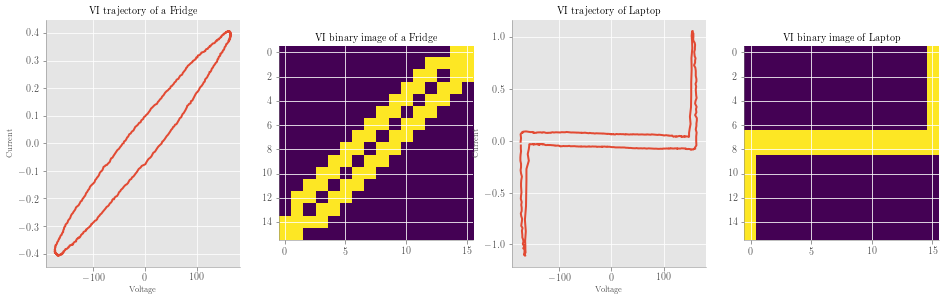

In [70]:
latexify(columns=2, fig_height=2.0)
ix=np.where(type_label==4)[0][30]
fig=plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(2,4,1)
format_axes(ax1)
plt.plot(rep_V[ix,:],rep_I[ix,:])
plt.title('VI trajectory of a Fridge')
plt.xlabel('Voltage')
plt.ylabel('Current')

ax2 = fig.add_subplot(2,4,2)
format_axes(ax2)
plt.imshow(Imgs[ix,:,:])
plt.title('VI binary image of a Fridge')

ix=np.where(type_label==8)[0][30]
ax3 = fig.add_subplot(2,4,3)
format_axes(ax3)
plt.plot(rep_V[ix,:],rep_I[ix,:])
plt.title('VI trajectory of Laptop')
plt.xlabel('Voltage')
plt.ylabel('Current')

ax4 = fig.add_subplot(2,4,4)
format_axes(ax4)
plt.imshow(Imgs[ix,:,:])
plt.title('VI binary image of Laptop')

fig.savefig('image/appliance.pdf', format='pdf')

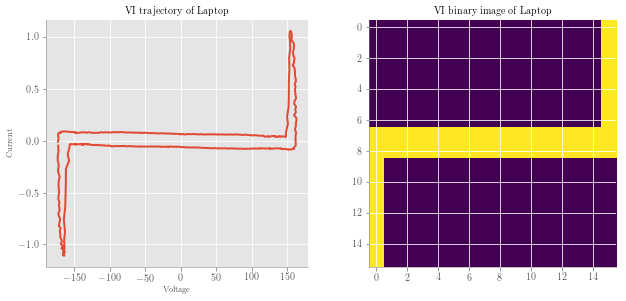

In [59]:
ix=np.where(type_label==8)[0][30]
fig=plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(2,4,1)
format_axes(ax1)
plt.plot(rep_V[ix,:],rep_I[ix,:])
plt.title('VI trajectory of Laptop')
plt.xlabel('Voltage')
plt.ylabel('Current')

ax3 = fig.add_subplot(2,4,2)
format_axes(ax3)
plt.imshow(Imgs[ix,:,:])
plt.title('VI binary image of Laptop')
fig.savefig('image/laptop.pdf', format='pdf')

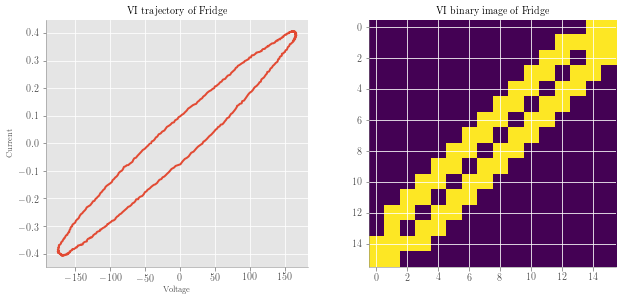

In [56]:
ix=np.where(type_label==4)[0][30]
fig=plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(2,3,1)
format_axes(ax1)
plt.plot(rep_V[ix,:],rep_I[ix,:])
plt.title('VI trajectory of Fridge')
plt.xlabel('Voltage')
plt.ylabel('Current')

ax3 = fig.add_subplot(2,3,2)
format_axes(ax3)
plt.imshow(Imgs[ix,:,:])
plt.title('VI binary image of Fridge')
fig.savefig('image/fridge.pdf', format='pdf')

## Feature Engineering with Decision Tree and Random Forest Classifier

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [15]:
def classifier(X_train,y_train,X_test,y_test,verbose=False):
    
    dTree = tree.DecisionTreeClassifier(max_depth=10)
    rForest = RandomForestClassifier(max_depth=10,n_estimators=20)
    acc = []
    f_score = []
    recall = []
    prec = []
    y_pred = []
    model_name = ["Decision Tree","Random Forest"]
    classifiers = [dTree, rForest]
   
    for (i,model) in enumerate(classifiers):
        model.fit(X_train, y_train)
        pred_y=np.around(model.predict(X_test))
        acc.append(accuracy_score(y_test, pred_y))
        f_score.append(f1_score(y_test, pred_y, average='macro'))
        recall.append(recall_score(y_test, pred_y, average='macro'))
        prec.append(precision_score(y_test, pred_y, average='macro')) 
        y_pred.append(pred_y)      

    return (acc, f_score, recall, prec, y_pred, model_name)

### Data preprocessing

In [16]:
#Combine Current and Voltage as one feature
features=np.hstack((rep_I[:,:10],rep_V[:,:10])) # Use both Current and Voltage

# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(features)

## Encode The Output Variable
The output variable contains 11 different int values. When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

In [17]:
from keras.utils import np_utils # help us transform our data later
target=np_utils.to_categorical(type_label,)

Using TensorFlow backend.


In [29]:
print("Before onehot transformation, a label was: %r " % type_label[0])
print("After  onehot transformation, a label is:  %r " % target[0])

Before onehot transformation, a label was: 2 
After  onehot transformation, a label is:  array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]) 


### Training and Testing Data Split

In [30]:
# Shuffle and split the dataset into the number of training and testing points above
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=0)

In [31]:
(acc, f_score, recall, prec, y_pred, names) = classifier(X_train,y_train,X_test,y_test)
print(names)
print(prec)

['Decision Tree', 'Random Forest']
[0.72680699993918385, 0.84389662912372343]


# Evaluation

A reasonable way to evalute the features is to train and test on different appliances, to makes sure the test instances won't show up in the training set, we propose an evaluation strategy. There are 55 households, we train on some households and test on the rest. Here we use leave-one-out cross-validation, where we train on 54 households on test on the rest one household. The process is repeated 55 times and the mean accuracy is reported.

In [32]:
# We orgainze the variables to be used
RawIV=np.concatenate((rep_I,rep_V),axis=1) # Combined current and voltage
allF = np.concatenate((rep_I,rep_V, RawIV, BinaryF),axis=1)
F = [rep_I, rep_V, RawIV,  BinaryF, allF]
namesF = ['Current','Voltage','CombinedIV', 'Images', 'All']
print('type label:',type_label)
print('location label:', loc_label)
print('number of different types: %d\n'% len(Unq_type),Unq_type)
print('number of different households: %d\b'% len(Unq_loc))

type label: [ 2  2  2 ...,  8  8 11]
location label: [ 1  1  1 ..., 51 51 51]
number of different types: 11
 ['Air Conditioner', 'Compact Fluorescent Lamp', 'Fan', 'Fridge', 'Hairdryer', 'Heater', 'Incandescent Light Bulb', 'Laptop', 'Microwave', 'Vacuum', 'Washing Machine']
number of different households: 55


In [33]:
def model_evaluation():
    start = datetime.now()
    n = len(Unq_loc)
    num_clf = 2
    num_f = len(F)
    acc = np.empty([num_f,num_clf])
    predictedY = [[np.empty([0],dtype='int')]*num_clf]*num_f
    trueY = np.empty([0],dtype='int')
    score_acc = []
    score_prec = []
    score_recall = []
    f_score = []
    for i in range(2):   
        print('%d/%d fold...\t time consumed: %ds'%(i+1,n,(datetime.now()-start).seconds))
        # split data into X_train,y_train,X_test,y_test based on households
        ix_test = np.where(loc_label==i+1)[0]
        ix_train = np.where(loc_label!=i+1)[0]
        temp_acc = np.empty([num_f,num_clf])
        # loop over each feature
        for (j,f) in enumerate(F):
            X_test = f[ix_test]
            y_test = type_label[ix_test]
            X_train = f[ix_train]
            y_train = type_label[ix_train]
        
            (acc, f1, recall, prec, y_p, name) = classifier(X_train, y_train, X_test, y_test)
            score_acc.append(acc)
            score_recall.append(recall)
            score_prec.append(prec)
            f_score.append(f1)
            
            predictedY[j] = [np.hstack([predictedY[j][ii],y_p[ii]]) for ii in range(num_clf)]
        trueY = np.hstack([trueY,y_test])
    return (score_acc,score_recall, score_prec, f_score, trueY, predictedY, name)     

In [79]:
acc, recall, prec, f1, y_t, y_p, name = model_evaluation()

1/55 fold...	 time consumed: 0s
2/55 fold...	 time consumed: 9s


In [80]:
Acc = np.array([[accuracy_score(y_t, i) for i in j] for j in y_p])
Acc

array([[ 0.65116279,  0.6744186 ],
       [ 0.48837209,  0.48837209],
       [ 0.69767442,  0.79069767],
       [ 0.62790698,  0.76744186],
       [ 0.74418605,  0.81395349]])

In [96]:
y_tapp, y_papp, app_name = appliance_data(4, y_p, y_t)

IndexError: list index out of range

In [89]:
def bar_plot(data_1, data_2,color, x_label,leg_label, title, plot_name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    

    ## the data
    N = len(data_1)


    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars

    ## the bars
    rects1 = ax.bar(ind, data_1, width, color=color[0])

    rects2 = ax.bar(ind+width, data_2, width, color=color[1])

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylim(0,1)
    ax.set_ylabel('Scores\n (Higher is better)')
    ax.set_title(title)
    xTickMarks = (x_label)
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=0)

    ## add a legend
    ax.legend( (rects1[0], rects2[0]), (leg_label[0], leg_label[1]) )
    format_axes(ax)
    
    plt.savefig('image/%s.pdf' %(plot_name), format='pdf')
    plt.show()
      

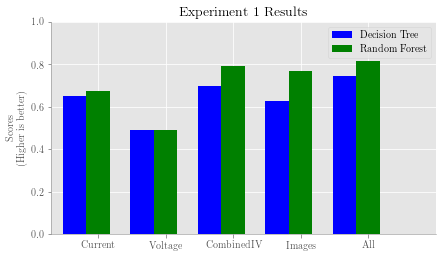

In [91]:
data_1 = Acc[:,0]
data_2 = Acc[:,1]
color = ['blue','green']
x_label = ['F1 score','Recall', 'Precision']
x_label = namesF
latexify(columns=2, fig_height=3.9)
bar_plot(data_1, data_2,color, x_label,leg_label, title="Experiment 1 Results", plot_name='Test')

In [82]:
Acc.shape

(5, 2)

In [158]:
data_1 = [Acc[0].mean(), F1[0].mean(), Recall[0].mean(), Prec[0].mean()]
data_2 = [Acc[1].mean(), F1[1].mean(), Recall[1].mean(), Prec[1].mean()]
color = ['blue','red']
x_label = ['Accuracy', 'F1 score','Recall', 'Precision']
leg_label =['Decision Tree', 'Random Forest']

In [68]:
Acc_ = np.array([[accuracy_score(y_t, i) for i in j] for j in y_p])
F1_ = np.array([[f1_score(y_t, i, average='macro') for i in j] for j in y_p])
Recall_ = np.array([[recall_score(y_t, i, average='macro') for i in j] for j in y_p])
Prec_= np.array([[precision_score(y_t, i, average='macro') for i in j] for j in y_p])

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: 

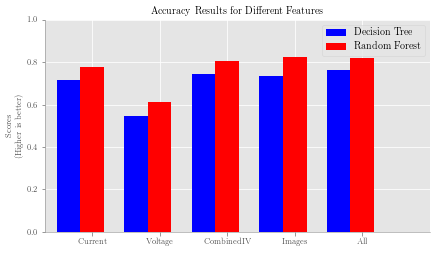

In [90]:
data_1 = Acc_[:,0]
data_2 = Acc_[:,1]
x_label = namesF
latexify(columns=2, fig_height=3.9)
bar_plot(data_1, data_2,color, x_label,leg_label, title="Accuracy Results for Different Features")

## Define CNN Model

We now define and train the CNN model using the ImageF data

In [34]:
# Shuffle and split the dataset into the number of training and testing points above
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ImageF, target, test_size=0.20, random_state=10)

In [42]:
### Global constants
####################

batch_size = 16
num_classes = 12
num_epochs = 100

# INPUT IMAGE DIMENSIONS
img_row, img_col = 16, 16
channel = 1

In [43]:
print("Shape of X_train: %r ", X_train.shape)
print("Shape of Y_train: %r ", y_train.shape)
print("Shape of X_test: %r ",  X_test.shape)
print("Shape of Y_test: %r ",  y_test.shape)

Shape of X_train: %r  (859, 16, 16, 1)
Shape of Y_train: %r  (859, 12)
Shape of X_test: %r  (215, 16, 16, 1)
Shape of Y_test: %r  (215, 12)


In [44]:
X_train= np.reshape(X_train, (X_train.shape[0],X_train.shape[1], X_train.shape[1],1))  # Reshape input 
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1],X_test.shape[2], 1))

In [45]:
import keras
from keras.models import Sequential # a linear stack of neural network layers
from keras.layers import Dense, Dropout, Activation, Flatten # the layers that are used in almost any neural network
from keras.layers import Convolution2D, MaxPooling2D # 2D convolutional and pooling layer
from keras.optimizers import SGD
from keras import metrics

In [71]:
# define the model
model = Sequential() # declare a sequential model
model.add(Convolution2D(32,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        activation='relu',
                        input_shape=(img_row, img_col, channel)))# Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function
model.add(Convolution2D(32, 3, 3,activation='relu')) # Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pool layer with size 2×2.
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))#Fully connected layer with 512 units and a rectifier activation function
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))#Fully connected output layer with 10 units and a softmax activation function.

In [72]:
# Compile the model
lrate = 0.01
decay = lrate/num_epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [73]:
# Fit the model
history = model.fit(X_train, y_train, nb_epoch=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
model.save_weights('cnn_plaid_1.h5') 

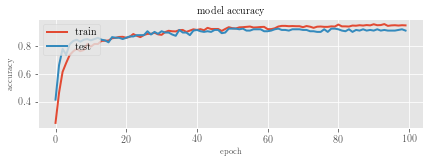

In [77]:
# summarize history for accuracy
# For visually better looking plots
latexify(columns=2, fig_height=2.0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0:100)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
score = model.evaluate(X_test, y_test, verbose=0)
scoret = model.evaluate(X_train, y_train, verbose=0)
print("Test Accuracy is  ", model.evaluate(X_test, y_test, verbose=0)[1]*100)
print("Train Accuracy is  ", scoret[1]*100)

Test Accuracy is   90.6976746404
Train Accuracy is   95.3434225844
